# Crop Yield Prediction 🌾

This notebook builds a machine learning pipeline to predict crop yield (tons per hectare) based on environmental and agricultural features using a Random Forest model.


## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## 2. Loading and Sampling Dataset

In [2]:
# Load the dataset
df = pd.read_csv("crop_yield.csv")
df = df.sample(n=100000, random_state=42)

# Features and target
X = df.drop("Yield_tons_per_hectare", axis=1)
y = df["Yield_tons_per_hectare"]

## 3. Data Preprocessing

In [3]:
# Identify categorical and numerical columns
categorical_cols = ["Region", "Soil_Type", "Crop", "Weather_Condition", "Fertilizer_Used", "Irrigation_Used"]
numerical_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest"]

# Preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

## 4. Model Pipeline Definition

In [4]:
# Model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

## 5. Splitting Dataset

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Training the Model

In [6]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rainfall_mm',
                                                   'Temperature_Celsius',
                                                   'Days_to_Harvest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Region', 'Soil_Type',
                                                   'Crop', 'Weather_Condition',
                                                   'Fertilizer_Used',
                                                   'Irrigation_Used'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## 7. Making Predictions

In [7]:
# Predictions
y_pred = model.predict(X_test)

## 8. Model Evaluation

In [8]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 0.42
R^2 Score: 0.91


## 9. Feature Importance

In [9]:
# Feature importance visualization
rf_model = model.named_steps['regressor']
encoder = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(encoded_cat_features)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": all_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

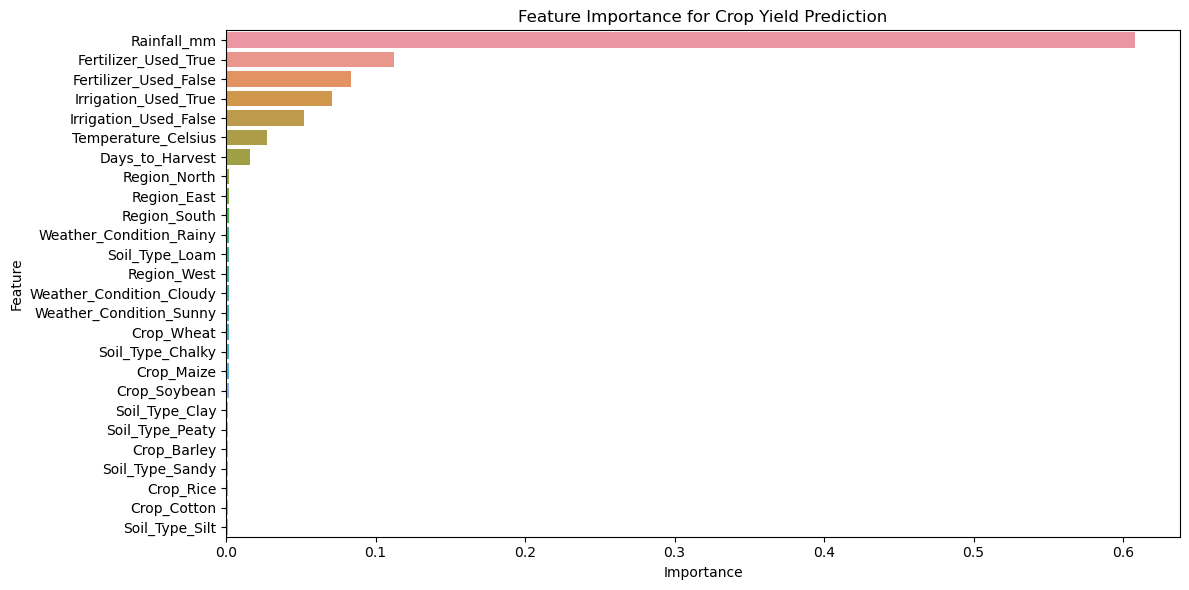

In [10]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance for Crop Yield Prediction")
plt.tight_layout()
plt.show()